# Plot embedded data

In [1]:
using NPZ, Printf, NNlib, Statistics, Plots, JLD2, LinearAlgebra, Distributions

In [2]:
pwd()

"/Users/chenwei/Desktop/Github/RPE/code"

## PCA Vis

In [5]:
data_npy = npzread("data/I1_0_pcaplot.npy")

Dict{String, Vector{Float64}} with 5 entries:
  "pca3"   => [-2.52928, -5.16416, -0.530833, -4.71694, -1.60063, 2.29721, 1.43…
  "time"   => [0.0, 1.0e-9, 4.0e-9, 4.0e-9, 4.0e-9, 5.0e-9, 5.0e-9, 5.0e-9, 5.0…
  "pca2"   => [2.33731, 4.88398, -1.48611, 3.46557, -0.266285, 2.66619, 3.56859…
  "pca1"   => [-2.05303, -1.68211, 0.410691, -2.7911, 0.136005, -2.78625, 4.733…
  "energy" => [0.0, 0.15, 0.0, 0.15, 0.0, 0.8, 0.41, 0.8, 0.41, 0.8  …  0.14, -…

### Plot PCA with 2 components X,Y-axes and energy as Z-axis with color

In [18]:
X = data_npy["pca1"]; Y = data_npy["pca2"]; Z = data_npy["energy"];

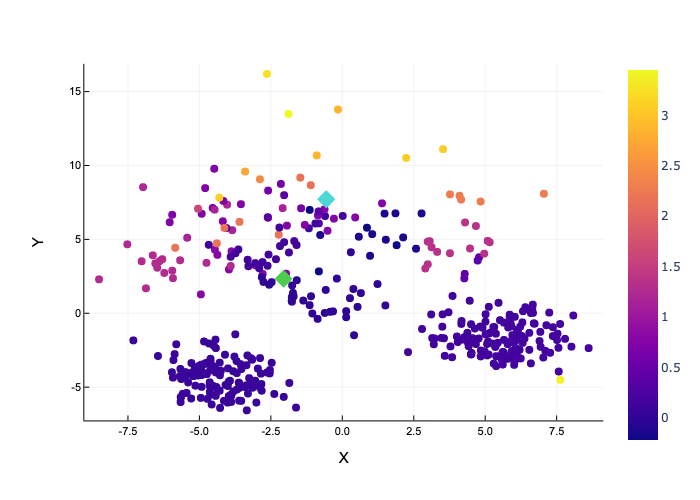

In [5]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=4,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=1) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[3],markershape=:diamond,opacity=1) # Blue for Sf
plot!(xlabel="X", ylabel="Y")

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/pca2_2d_fps5.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/pca2_2d_fps5.gif")
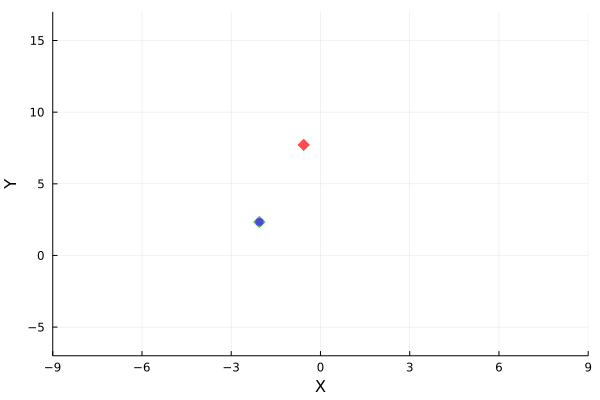

In [6]:
# 2D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,display_option=Plots.GR.OPTION_LINES,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(floor(minimum(X)),ceil(maximum(X))) 
    ylims!(floor(minimum(Y)),ceil(maximum(Y)))
    plot!(xlabel="X", ylabel="Y")
    
end #every 100

gif(anim,"../plot/pca2_2d_fps5.gif", fps=5)

In [19]:
# 2D landscape gif
gr()
plot()

anim = @animate for i in 1:length(X)
    scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=5,legend=false)

    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[3],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Blue for Sf
    scatter!([X[i]],[Y[i]],color=palette(:grays)[2],
            markersize=4.5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(floor(minimum(X)),ceil(maximum(X))) 
    ylims!(floor(minimum(Y)),ceil(maximum(Y)))
    plot!(xlabel="X", ylabel="Y")
    
end #every 100

gif(anim,"../plot/pca2_gifland_fps5.gif", fps=5)

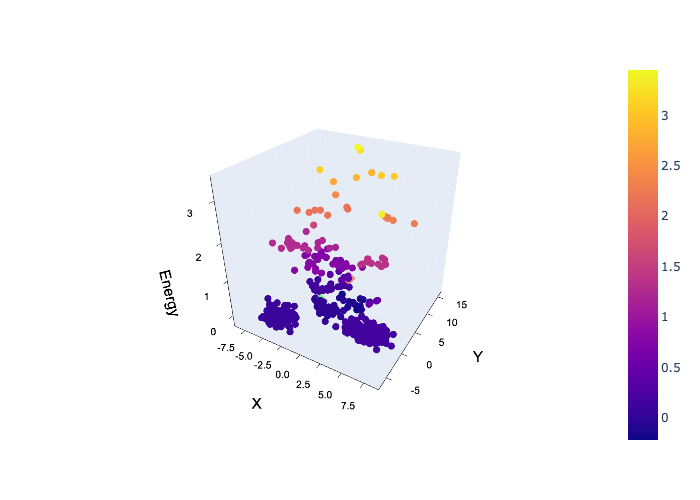

In [7]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=2,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf
plot!(xlabel="X", ylabel="Y", zlabel = "Energy")


┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/pca2_zcolorG_fps5.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/pca2_zcolorG_fps5.gif")
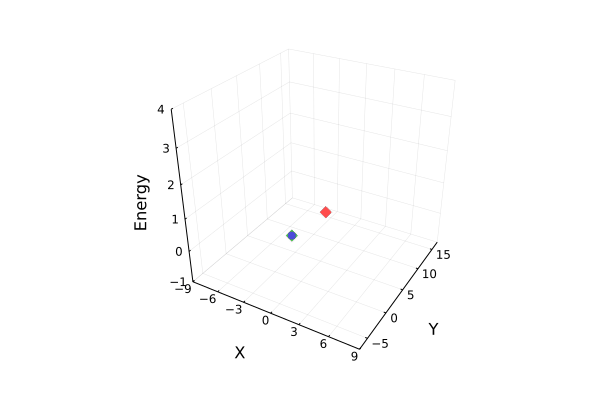

In [8]:
# 3D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],[Z[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(floor(minimum(X)),ceil(maximum(X))); ylims!(floor(minimum(Y)),ceil(maximum(Y))),
        zlims!(floor(minimum(Z)),ceil(maximum(Z)))
    plot!(xlabel="X", ylabel="Y", zlabel = "Energy")
    
end #every 100

gif(anim,"../plot/pca2_zcolorG_fps5.gif", fps=5)

### Plot PCA with 3 components X,Y,Z-axes, and energy as color 

In [9]:
X=data_npy["pca1"]; Y=data_npy["pca2"]; Z=data_npy["pca3"]; energy=data_npy["energy"];

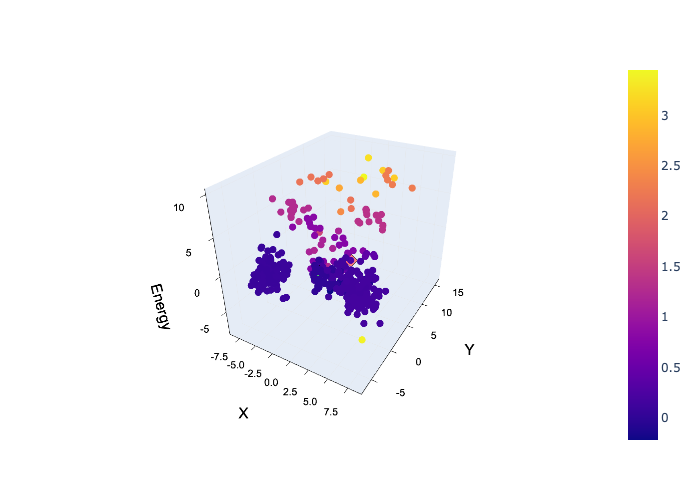

In [10]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=energy,m=cgrad(:plasma),markerstrokewidth=0,markersize=2,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf
plot!(xlabel="X", ylabel="Y", zlabel = "Energy")


┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/pca3_zcolorG_fps5.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/pca3_zcolorG_fps5.gif")
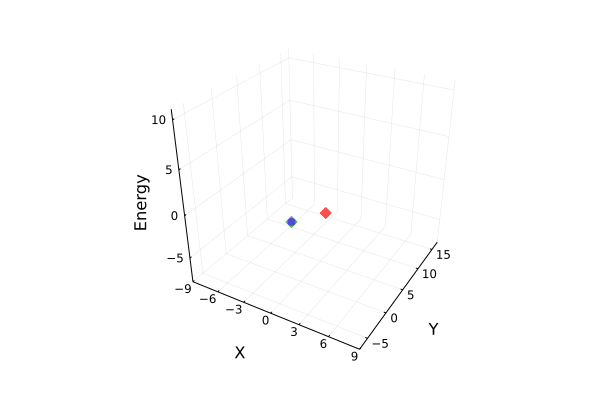

In [11]:
# 3D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,display_option=Plots.GR.OPTION_LINES,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],[Z[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(floor(minimum(X)),ceil(maximum(X))); ylims!(floor(minimum(Y)),ceil(maximum(Y))),
        zlims!(floor(minimum(Z)),ceil(maximum(Z)))
    plot!(xlabel="X", ylabel="Y", zlabel = "Energy") # camera=(32,3)
    
end #every 100

gif(anim,"../plot/pca3_zcolorG_fps5.gif", fps=5)

## PHATE Vis

In [12]:
phate_npy = npzread("data/I1_0_phateplot.npy")

Dict{String, Array{Float64}} with 3 entries:
  "time"   => [0.0, 1.0e-9, 4.0e-9, 4.0e-9, 4.0e-9, 5.0e-9, 5.0e-9, 5.0e-9, 5.0…
  "energy" => [0.0, 0.15, 0.0, 0.15, 0.0, 0.8, 0.41, 0.8, 0.41, 0.8  …  0.14, -…
  "phate"  => [-0.0256903 0.0279634; -0.0082059 0.0483937; … ; 0.0178703 0.0476…

In [13]:
X = phate_npy["phate"][:,1]; Y = phate_npy["phate"][:,2]; Z = phate_npy["energy"];

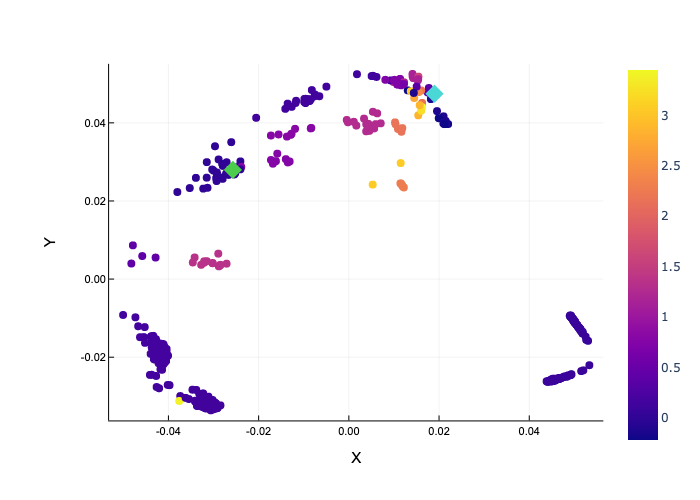

In [14]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=4,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=1) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[3],markershape=:diamond,opacity=1) # Blue for Sf
plot!(xlabel="X", ylabel="Y")

In [15]:
minimum(X),maximum(X),minimum(Y),maximum(Y)

(-0.05005166308528142, 0.05332183273727113, -0.0336019673802943, 0.05252588035075181)

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/phate2_2d_fps5.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/phate2_2d_fps5.gif")
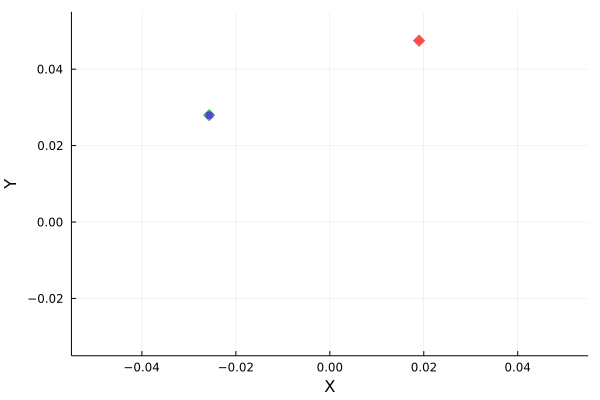

In [17]:
# 2D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(-0.055,0.055) 
    ylims!(-0.035,0.055)
    plot!(xlabel="X", ylabel="Y")
    
end #every 100

gif(anim,"../plot/phate2_2d_fps5.gif", fps=5)

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/phate2_gifland_fps5.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/phate2_gifland_fps5.gif")
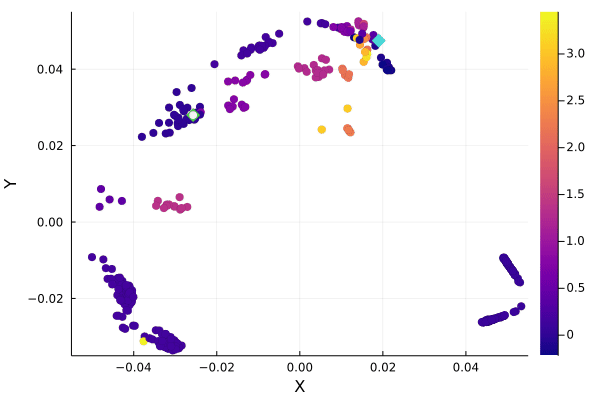

In [106]:
# 2D landscape gif
gr()
plot()

anim = @animate for i in 1:length(X)
    scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=5,legend=false)

    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[3],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Blue for Sf
    scatter!([X[i]],[Y[i]],color=palette(:grays)[2],
            markersize=4.5,markerstrokewidth=0,
            legend=false,)#fps=5)

    # if i > 1
    #     scatter!([X[i-1]],[Y[i-1]],color=cgrad(:Blues)[0.1],
    #         markersize=5,markerstrokewidth=0,
    #         legend=false,)#fps=1)
    # end
    xlims!(-0.055,0.055) 
    ylims!(-0.035,0.055)
    plot!(xlabel="X", ylabel="Y")
    
end #every 100

gif(anim,"../plot/phate2_gifland_fps5.gif", fps=5)

In [104]:
# 2D gif test 
plotlyjs()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=4,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=1) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[3],markershape=:diamond,opacity=1) # Blue for Sf
plot!(xlabel="X", ylabel="Y")